# Clustering of similar faces in Olivetti faces dataset

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
faces_data = fetch_olivetti_faces()

In [4]:
print(faces_data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
X = faces_data.data
y = faces_data.target

In [5]:
X.shape

(400, 4096)

In [6]:
y.shape

(400,)

In [7]:
sample_face = X[1]

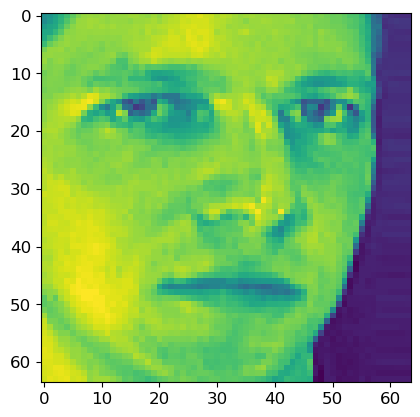

In [8]:
plt.imshow(sample_face.reshape(64,64))

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
strata = StratifiedShuffleSplit(n_splits = 1, test_size = 40, random_state=42)

In [11]:
train_valid_idx, test_idx = next(strata.split(X, y))

In [12]:
X_train_valid = X[train_valid_idx]
y_train_valid = y[train_valid_idx]
X_test = X[test_idx]
y_test = y[test_idx]

In [13]:
X_train_valid.shape

(360, 4096)

In [14]:
X_test.shape

(40, 4096)

In [15]:
strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))

In [16]:
X_train = X[train_idx]
y_train = y[train_idx]
X_val = X[valid_idx]
y_val = y[valid_idx]

In [17]:
X_train.shape

(280, 4096)

In [18]:
X_val.shape

(80, 4096)

In [19]:
#reduce the dimensions
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [21]:
from sklearn.cluster import KMeans

In [22]:
clusters = range(10,100,5)
kmeans_per_k = []

In [55]:
for cluster in clusters:
    estimator = KMeans(n_clusters = cluster, init='random', n_init = 10, random_state=43).fit(X_train_pca)
    kmeans_per_k.append(estimator)

In [56]:
#selecting optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = clusters[best_index]

In [57]:
best_score = silhouette_scores[best_index]

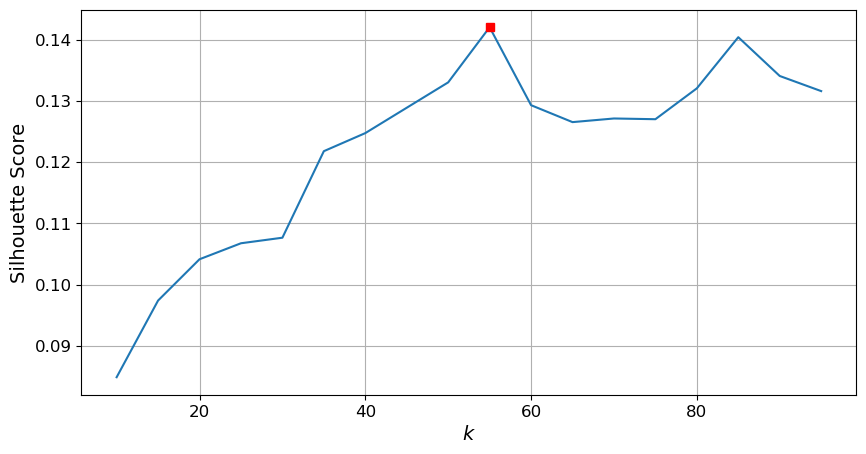

In [58]:
plt.figure(figsize=(10,5))
plt.plot(clusters, silhouette_scores)
plt.xlabel('$k$')
plt.ylabel('Silhouette Score')
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [59]:
best_k

55

In [60]:
inertia = [model.inertia_ for model in kmeans_per_k]

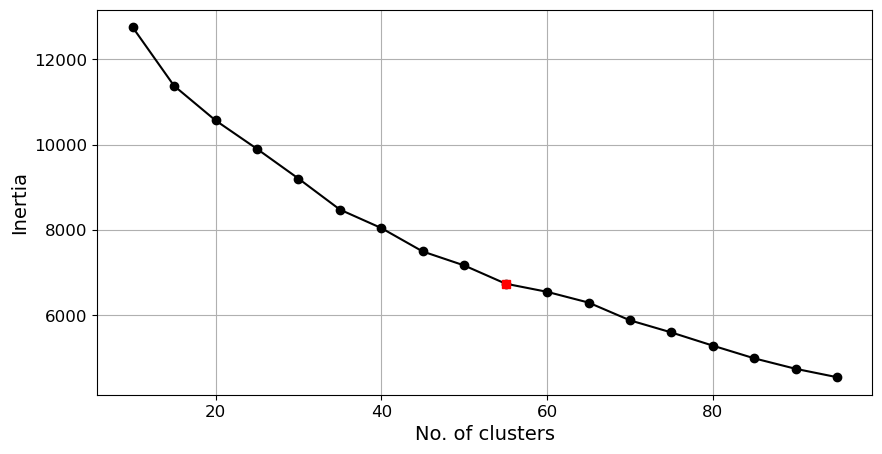

In [61]:
fig,ax = plt.subplots(figsize = (10,5))

ax.plot(clusters,inertia , 'ko-')
ax.set_xlabel('No. of clusters')
ax.set_ylabel('Inertia')
ax.plot(best_k,inertia[best_index], 'rs')
ax.grid()
plt.show()

In [62]:
best_model = kmeans_per_k[best_index]

In [41]:
def plot_faces(faces, labels, n_cols = 5):
    faces = faces.reshape(-1, 64,64)
    n_rows = (len(faces) - 1)// n_cols + 1
    plt.figure(figsize = (n_cols, n_rows * 1.1))
    for index, (face,label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols,index + 1)
        plt.imshow(face,cmap = "gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

Cluster 0


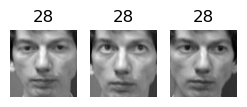

Cluster 1


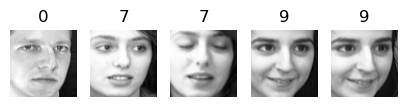

Cluster 2


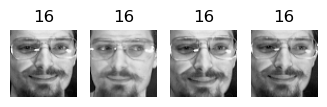

Cluster 3


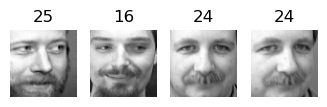

Cluster 4


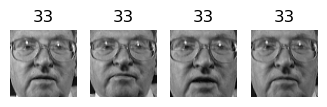

Cluster 5


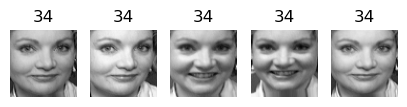

Cluster 6


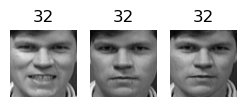

Cluster 7


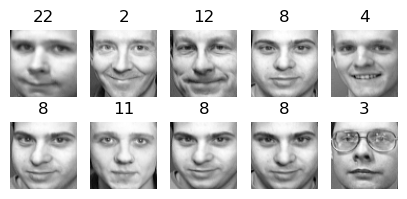

Cluster 8


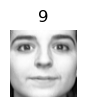

Cluster 9


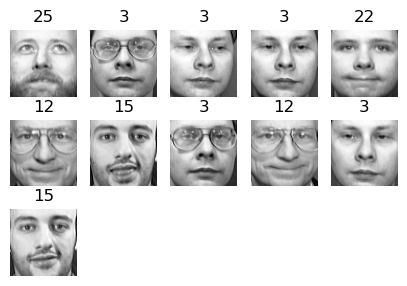

Cluster 10


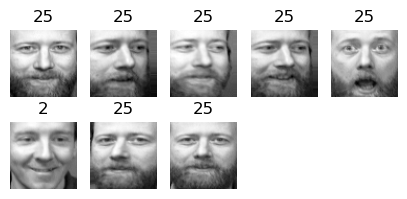

Cluster 11


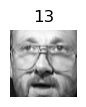

Cluster 12


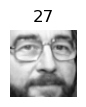

Cluster 13


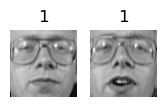

Cluster 14


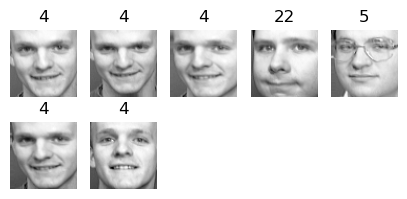

Cluster 15


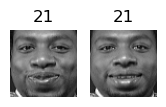

Cluster 16


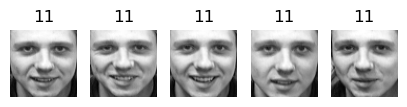

Cluster 17


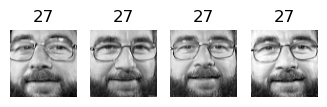

Cluster 18


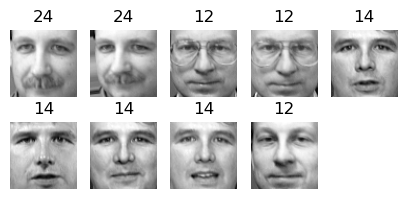

Cluster 19


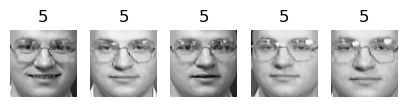

Cluster 20


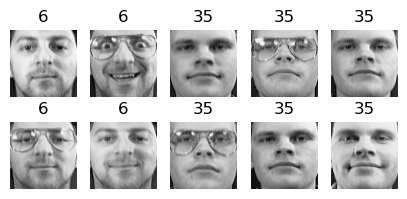

Cluster 21


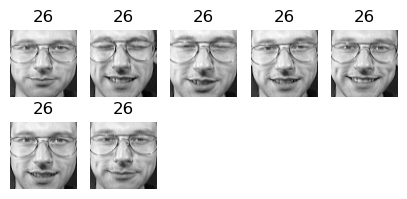

Cluster 22


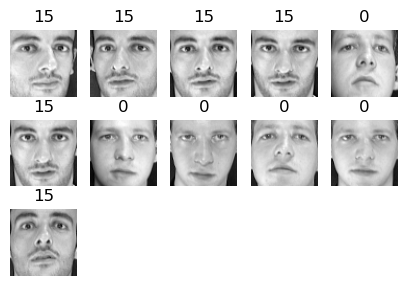

Cluster 23


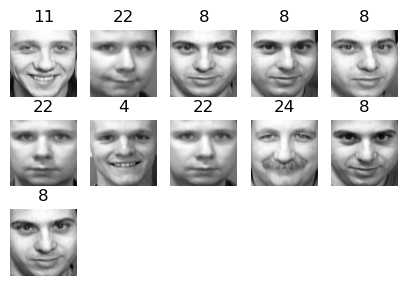

Cluster 24


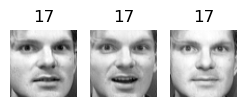

Cluster 25


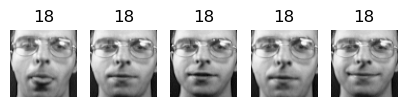

Cluster 26


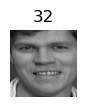

Cluster 27


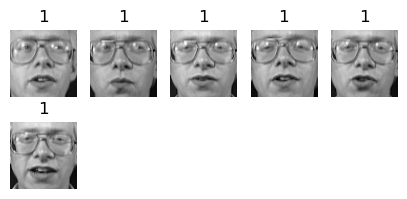

Cluster 28


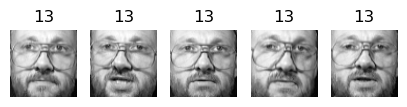

Cluster 29


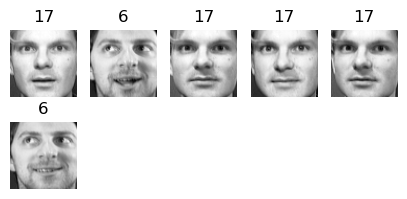

Cluster 30


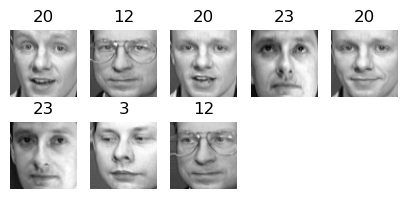

Cluster 31


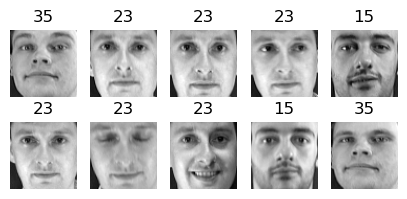

Cluster 32


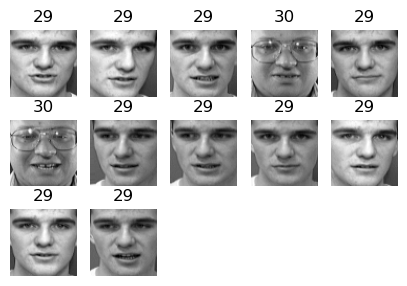

Cluster 33


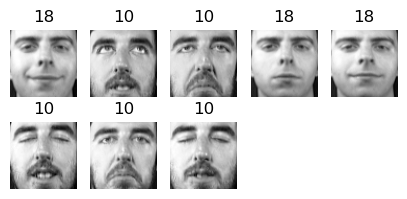

Cluster 34


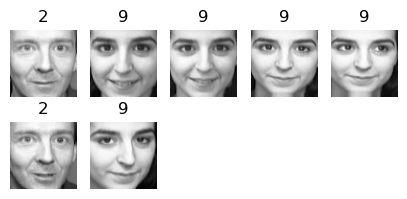

Cluster 35


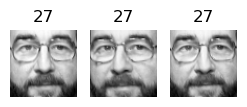

Cluster 36


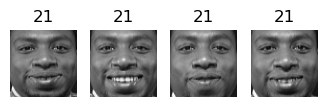

Cluster 37


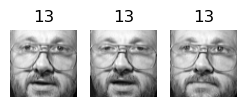

Cluster 38


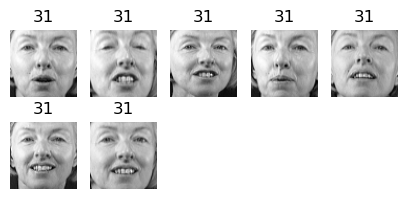

Cluster 39


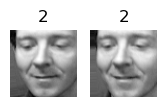

Cluster 40


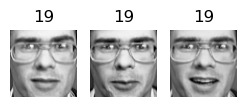

Cluster 41


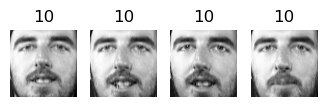

Cluster 42


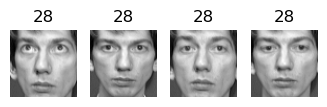

Cluster 43


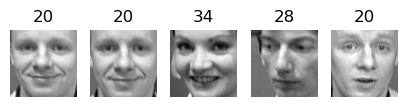

Cluster 44


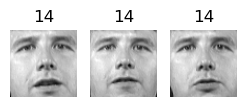

Cluster 45


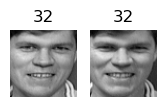

Cluster 46


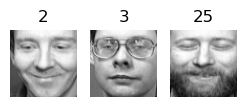

Cluster 47


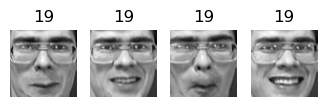

Cluster 48


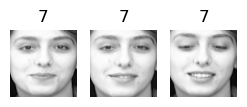

Cluster 49


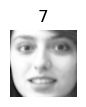

Cluster 50


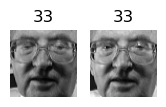

Cluster 51


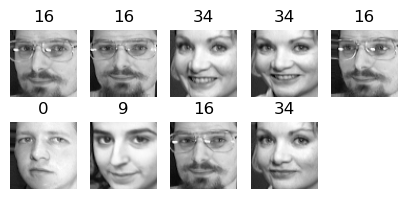

Cluster 52


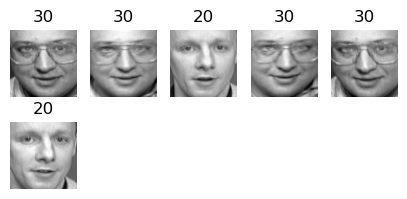

Cluster 53


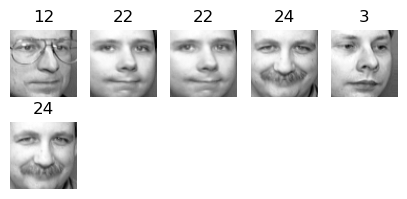

Cluster 54


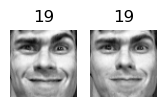

In [64]:
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## using clustering as preprocessing for classification

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
clf = RandomForestClassifier(n_estimators=130, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_val_pca, y_val)

0.95

In [67]:
X_train_pca.shape

(280, 200)

In [69]:
#using kmeans as a dimensionality reduction tool

X_train_red = best_model.transform(X_train_pca)
X_val_red = best_model.transform(X_val_pca)
X_test_red = best_model.transform(X_test_pca)

In [70]:
X_train_red.shape

(280, 55)

In [71]:
clf = RandomForestClassifier(n_estimators=130, random_state=42)
clf.fit(X_train_red, y_train)
clf.score(X_val_red, y_val)

0.7375

In [72]:
#tuning the number of clusters
from sklearn.pipeline import make_pipeline

for n_clusters in clusters:
    pipeline = make_pipeline(
    KMeans(n_clusters = n_clusters, random_state=42),
    RandomForestClassifier(n_estimators=150, random_state=42))
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_val_pca, y_val))

10 0.5375
15 0.6125
20 0.575
25 0.65
30 0.65
35 0.65
40 0.7375
45 0.6875
50 0.75
55 0.7125
60 0.7375
65 0.725
70 0.725
75 0.7125
80 0.7375
85 0.75
90 0.7
95 0.75


In [73]:
#looks like distances to cluster centroids are not as informative as the original images
# let's try combining these features

X_train_extended = np.c_[X_train_pca, X_train_red]
X_val_extended = np.c_[X_val_pca, X_val_red]
X_test_extended = np.c_[X_test_pca, X_test_red]

In [75]:
clf  = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_val_extended, y_val) #better but not as good as the original dataset

0.85

## A Gaussian mixture model for the Olivetti faces dataset

In [23]:
from sklearn.mixture import GaussianMixture

In [24]:
help(GaussianMixture)

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      'full'
 |          each compo

In [25]:
gm = GaussianMixture(n_components=40, n_init = 10)

In [26]:
gm.fit(X_train_pca)

GaussianMixture(n_components=40, n_init=10)

In [28]:
gm.weights_

array([0.01785714, 0.01785714, 0.025     , 0.02142857, 0.01785714,
       0.04642857, 0.03214286, 0.03571429, 0.03928571, 0.01428571,
       0.01785714, 0.02142857, 0.01785714, 0.03571429, 0.01071429,
       0.01785714, 0.02142857, 0.02857143, 0.02142857, 0.05      ,
       0.02857143, 0.01785714, 0.025     , 0.04642857, 0.01785714,
       0.01785714, 0.01428571, 0.03214286, 0.01428571, 0.03214286,
       0.02857143, 0.01428571, 0.03571429, 0.03214286, 0.01071429,
       0.03571429, 0.00714286, 0.03571429, 0.00714286, 0.03571429])

In [29]:
gm.converged_

True

In [30]:
gm.n_iter_

2

In [32]:
gm.predict(X_test_pca)

array([ 8, 14, 21, 29, 33,  5, 27,  5, 35,  5, 39,  7,  9, 37, 20, 23,  6,
       25,  1, 39, 16, 29, 18, 33, 11, 17,  7, 22,  4, 19,  0, 35, 13,  0,
       26,  5,  5, 24,  2, 23])

In [43]:
X_new, y_new = gm.sample(20)

In [44]:
X_new.shape

(20, 200)

In [45]:
X_new = pca.inverse_transform(X_new)

In [46]:
X_new.shape

(20, 4096)

In [47]:
temp = X_new.reshape(-1,64,64)

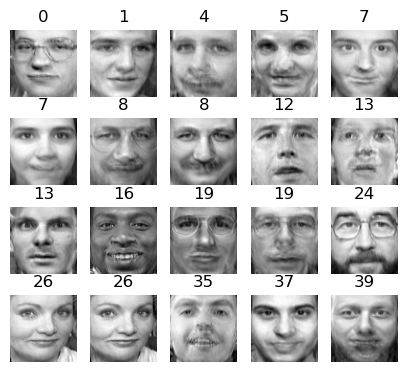

In [48]:
plot_faces(temp, y_new)

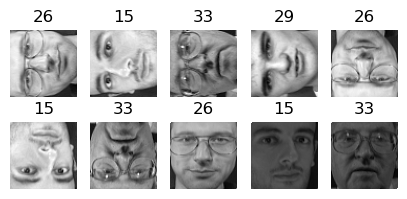

In [50]:
#modifying some faces
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [51]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [52]:
gm.score_samples(X_bad_faces_pca)

array([-3.45033337e+07, -3.05303751e+07, -2.23567988e+07, -2.79177582e+07,
       -5.31700334e+07, -2.57159783e+07, -2.96140148e+07, -1.09538829e+08,
       -1.00986742e+08, -1.34684950e+08])

# Using dimensionality reduction techniques for anomaly detection

In [49]:
X_train_pca.round(2)

array([[-0.66, -3.12,  2.09, ..., -0.28,  0.38,  0.02],
       [-1.87, -3.89, -2.09, ...,  0.09,  0.05, -0.15],
       [ 8.3 , -0.71, -3.55, ..., -0.22,  0.06, -0.02],
       ...,
       [-2.72,  1.86, -0.4 , ..., -0.06, -0.11,  0.04],
       [-0.56,  1.41,  2.92, ..., -0.01,  0.17, -0.  ],
       [-1.92, -5.37, -4.26, ...,  0.02, -0.05, -0.08]], dtype=float32)

In [53]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [54]:
reconstruction_errors(pca, X_train).mean()

0.00018287865

In [55]:
reconstruction_errors(pca, X_bad_faces).mean()

0.005636581

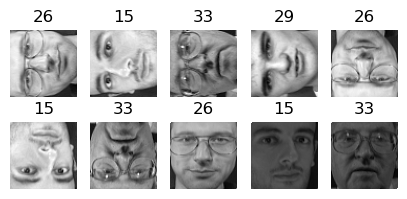

In [56]:
plot_faces(X_bad_faces, y_bad)

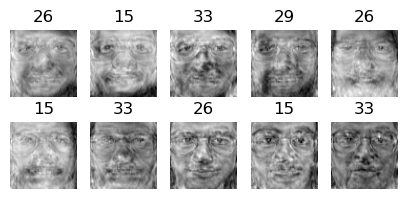

In [57]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)